### Fashion-MNIST Image Classification with TensorFlow
Follow the code to train a simple neural network that classifies images of clothing. 

In [1]:
# Import Tensorflow and check version
import tensorflow as tf
# Import TensorFlow Keras
from tensorflow import keras
#Import numpy
import numpy as np
#Import matplotlib
import matplotlib.pyplot as plt

2023-07-15 15:22:36.017566: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


We are going to work with the Fashion-MNIST data set. The data set contains images of Zalando's article images. The images are divided into 10 classes, from 0 to 9, where each class represents a category of clothing:


| Class 	| Name        	|
|-------	|-------------	|
| 0     	| T-shirt/top 	|
| 1     	| Trouser     	|
| 2     	| Pullover    	|
| 3     	| Dress       	|
| 4     	| Coat        	|
| 5     	| Sandal      	|
| 6     	| Shirt       	|
| 7     	| Sneaker     	|
| 8     	| Bag         	|
| 9     	| Ankle boot  	|


The Fashion-MNIST data set is part of the TensorFlow data set module.

In [2]:
# Import the dataset.

fashion_mnist = keras.datasets.fashion_mnist

In [3]:
# Load data set as four numpy arrays: 

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# For training the model, we will use train_images and train_labels arrays.
# To test the performance of the trained model, we are going to use the test_images and test_labels arrays.

4422102/4422102 [==============================] - 1s 0us/step


Let's explore the data set:

In [4]:
print(f'There are {len(train_images)} images in the training set and {len(test_images)} images in the testing set.')

There are 60000 images in the training set and 10000 images in the testing set.


In [5]:
print(f'There are {len(train_labels)} labels in the training set and {len(test_labels)} labels in the test set.')

There are 60000 labels in the training set and 10000 labels in the test set.


In [6]:
print(f'The images are {train_images[0][0].size} x {train_images[0][1].size} NumPy arrays.')

The images are 28 x 28 NumPy arrays.


In [7]:
# The images are labeled with integers ranging from 0 to 9.
train_labels[0:20]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4],
      dtype=uint8)

In [8]:
label_cloth_dict = {0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 
                     3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', 
                     7:'Sneaker', 8:'Bag', 9:'Ankle boot' }

In [9]:
def label_name(x):
    return label_cloth_dict[x]

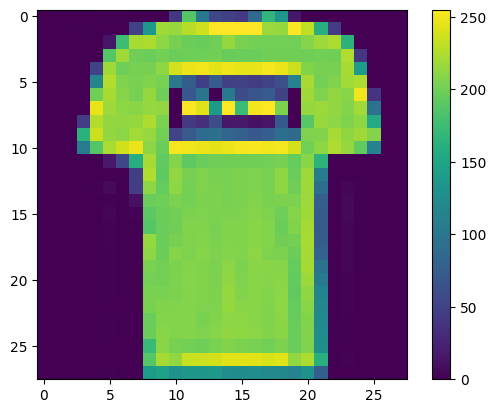

In [10]:
# Let's have a look at one of the images. The following code visualizes the images using the matplotlib library.

plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.show()




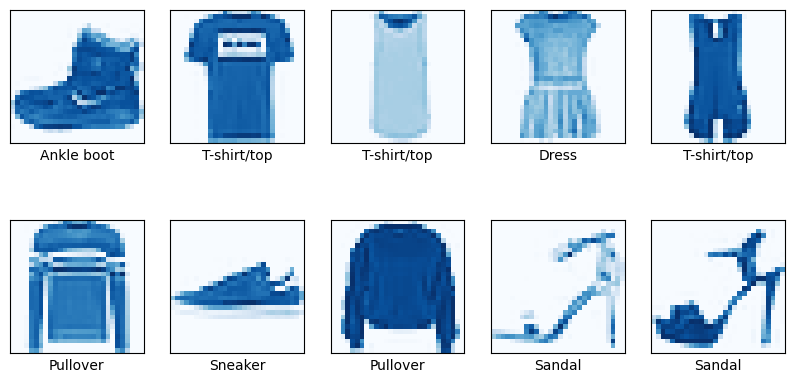

In [11]:
# Let's look again at the first ten images, but this time with the class names.
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='Blues')
    plt.xlabel(label_name(train_labels[i]))
plt.show()

In [12]:
# The pixel values range from 0 to 255. 
# Let's divide the image arrays by 255 to scale them to the range 0 to 1.

train_images = train_images / 255.0

test_images = test_images / 255.0

In [13]:
# Let's build the model:

simple_model = keras.Sequential([
    # Flatten two dimansional images into one dimansion 28*28pixles=784pixels.
    keras.layers.Flatten(input_shape=(28, 28)),
    # First dense/ fully connected layer: 128 nodes.
    keras.layers.Dense(128, activation='relu'),
    # Second dense/ fully connected layer: 10 nodes --> Result is a score for each images class.
    keras.layers.Dense(10)])

2023-07-15 15:22:44.392868: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:999] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-15 15:22:44.749850: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:999] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-15 15:22:44.749922: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:999] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-15 15:22:44.751633: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:999] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-15 15:22:44.751702: I tensorflow/compile

In [14]:
# Compile the model:
# Define loss function, optimizer, and metrics.

simple_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
# Train the model:
# Let's train 15 epochs. After every epoch, training time, loss, and accuracy will be displayed.

simple_model.fit(train_images, train_labels, epochs=15)

Epoch 1/15


2023-07-15 15:22:45.669243: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2023-07-15 15:22:45.785048: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2023-07-15 15:22:46.396402: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f5f19d126d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-15 15:22:46.396449: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 3GB, Compute Capability 6.1
2023-07-15 15:22:46.400967: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-07-15 15:22:46.462099: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8902
2023-07-15 15:22:46.798312: I ./tensorflow/compiler/jit/device_co

1875/1875 [==============================] - 8s 4ms/step - loss: 0.4965 - accuracy: 0.8253
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3769 - accuracy: 0.8624
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3375 - accuracy: 0.8764
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3111 - accuracy: 0.8868
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2954 - accuracy: 0.8916
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2805 - accuracy: 0.8961
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2681 - accuracy: 0.9005
Epoch 8/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2563 - accuracy: 0.9055
Epoch 9/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2466 - accuracy: 0.9080
Epoch 10/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2382 - accurac

With every epoch, the loss function decreases and the accuracy increases. After 15 epochs, the accuracy is around 92%.

In [16]:
# Let's see how the model performs on the test data:

test_loss, test_acc = simple_model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3525 - accuracy: 0.8860


The accuracy of the predictions is around 88%. 

---

Here you go! You trained your first model and used it to make predictions on test data.
For more advanced TensorFlow examples and in-depth explanations of the different steps, visit https://www.tensorflow.org/tutorials.

To explore all NGC Containers, visit https://ngc.nvidia.com/. The NGC Catalog offers not only GPU optimized containers but also Helm Charts, pre-trained models and model scripts. 